In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.stattools import adfuller

In [115]:
df = pd.read_excel('17-18.xlsx')
df.head()

,Неділя,Всього захворіло,у т.ч.діти до 17 років,18 - 29,30 - 64,65 та старші,Госпіталізація,Показник захворюваності,Епідпоріг,Перевищення епідпорогу (%)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.0,7891.0,5836.0,639.0,1147.0,269.0,142.0,291.94,527.44,-44.65
2,42.0,6736.0,4928.0,517.0,1029.0,262.0,160.0,249.21,541.73,-54.00
3,43.0,6835.0,4392.0,796.0,1307.0,340.0,147.0,252.87,634.05,-60.12
4,44.0,7595.0,4965.0,870.0,1377.0,383.0,160.0,280.99,568.92,-50.61


In [116]:
df = df.iloc[1:]
dic = list(df.columns)
col_dict = dict(zip(dic, ['week', 'total','upto17', '18-29', '30-64', '65+', 'hospital', 'indicator', 'epid', 'epid excess']))
df2 = df.rename(columns = col_dict, inplace = False)
df2[['week', 'total', 'upto17', '18-29', '30-64', '65+', 'hospital']] \
= df2[['week', 'total', 'upto17', '18-29', '30-64', '65+', 'hospital']].astype(int)
# df2.set_index('week', inplace=True, drop=True)
df2.head()

,week,total,upto17,18-29,30-64,65+,hospital,indicator,epid,epid excess
1,41,7891,5836,639,1147,269,142,291.94,527.44,-44.65
2,42,6736,4928,517,1029,262,160,249.21,541.73,-54.00
3,43,6835,4392,796,1307,340,147,252.87,634.05,-60.12
4,44,7595,4965,870,1377,383,160,280.99,568.92,-50.61
5,45,8209,5511,894,1448,356,168,303.70,572.42,-46.94


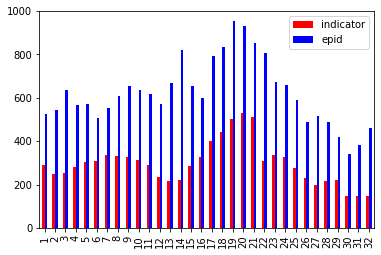

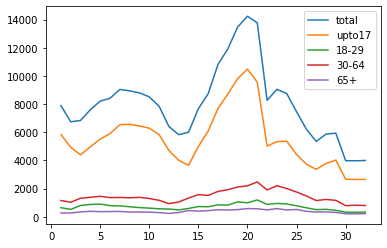

In [117]:
# df2.iloc[:, 1].plot(kind='bar', color='grey')
df2.iloc[:, 7:9].plot(kind='bar', color=['red', 'blue'])
df3 = df2.iloc[:, 1:6]
df3.plot()
# df2.iloc[:, 7].plot(kind='bar', color='black')


<Figure size 432x288 with 0 Axes>

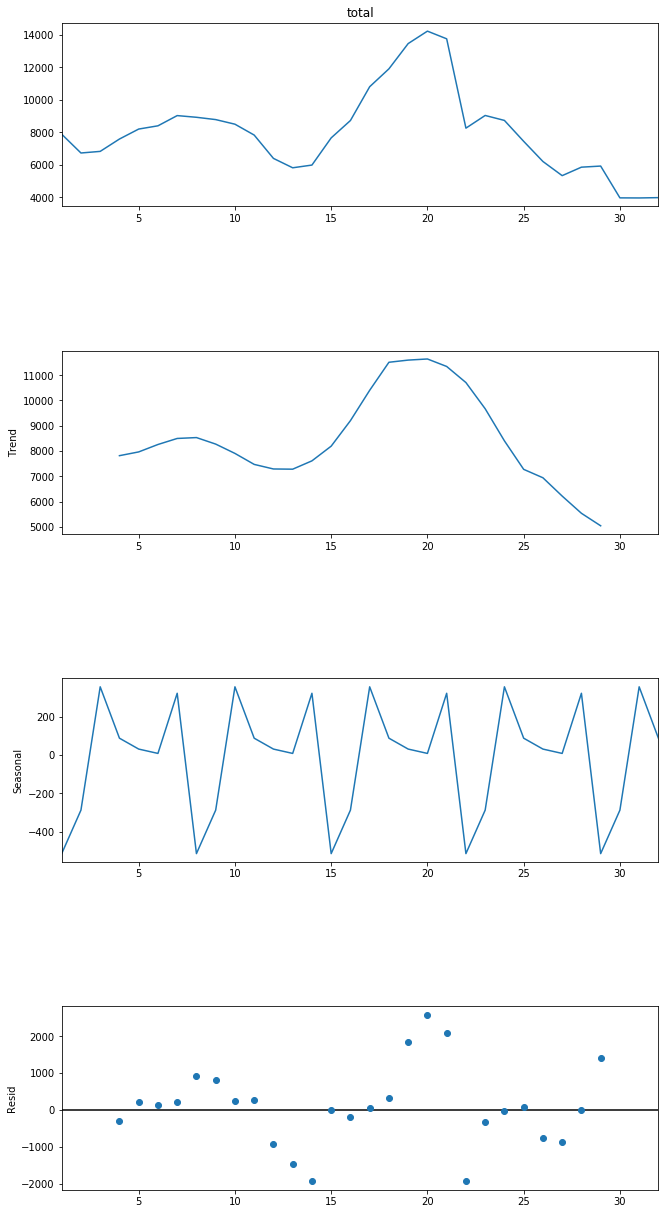

In [118]:
decomposition = seasonal_decompose(df2.total, period=7)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(10, 20)

In [119]:
trend = decomposition.trend
seasonal = decomposition.seasonal
print(trend, seasonal, sep='\n')
# df2.resample('3T').sum()

1              NaN
2              NaN
3              NaN
4      7815.857143
5      7964.714286
6      8258.285714
7      8497.285714
8      8532.142857
9      8274.285714
10     7905.428571
11     7470.571429
12     7289.571429
13     7281.428571
14     7610.714286
15     8192.857143
16     9202.000000
17    10403.000000
18    11512.714286
19    11598.285714
20    11642.714286
21    11346.571429
22    10709.428571
23     9673.142857
24     8403.142857
25     7275.000000
26     6941.714286
27     6217.428571
28     5536.000000
29     5041.142857
30             NaN
31             NaN
32             NaN
Name: trend, dtype: float64
1    -514.544218
2    -287.794218
3     355.158163
4      87.312925
5      30.527211
6       7.884354
7     321.455782
8    -514.544218
9    -287.794218
10    355.158163
11     87.312925
12     30.527211
13      7.884354
14    321.455782
15   -514.544218
16   -287.794218
17    355.158163
18     87.312925
19     30.527211
20      7.884354
21    321.455782
22   -5

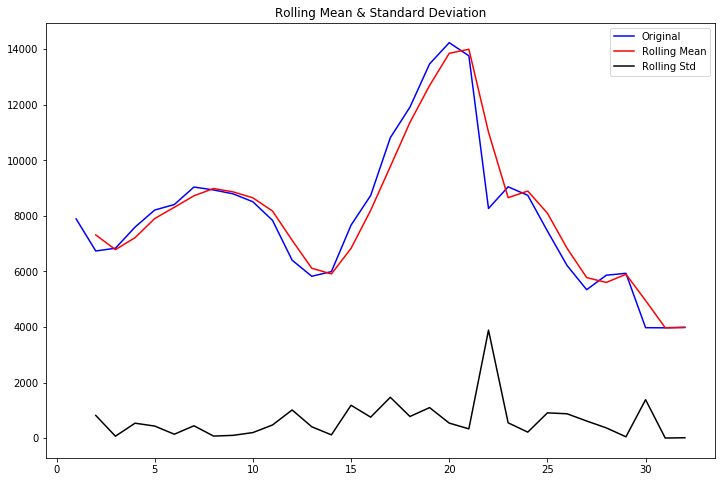

Results of Dickey-Fuller Test:
Test Statistic                 -1.043558
p-value                         0.737048
#Lags Used                      0.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [120]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=2).mean()
    rolstd = pd.Series(timeseries).rolling(window=2).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(df2.total)

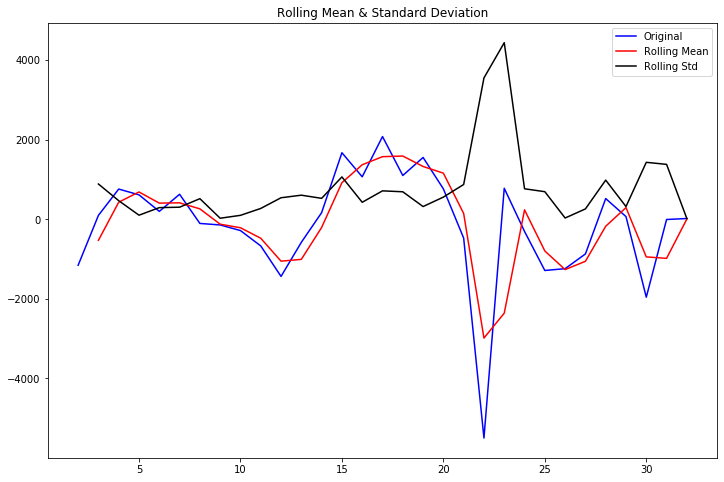

Results of Dickey-Fuller Test:
Test Statistic                 -4.321962
p-value                         0.000407
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [121]:
#first difference
df2['first_diff'] = df2.total - df2.total.shift(1)
test_stationarity(df2.first_diff.dropna(inplace=False))

In [1]:
#ACF and PACF charts
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.first_diff[5:], lags=12, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df2.first_diff.iloc[5:], lags=12, ax=ax2)

NameError: name 'plt' is not defined

In [132]:
mod = SARIMAX(df2.total, trend='n', order=(1,0,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

/Users/arima/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/arima/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


                                      SARIMAX Results                                       
Dep. Variable:                                total   No. Observations:                   32
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 12)   Log Likelihood                -181.845
Date:                              Wed, 21 Apr 2021   AIC                            371.689
Time:                                      12:12:56   BIC                            375.672
Sample:                                           0   HQIC                           372.467
                                               - 32                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8915      0.074     12.031      0.000       0.746       1.037
ar.S.L12      -0.29

/Users/arima/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


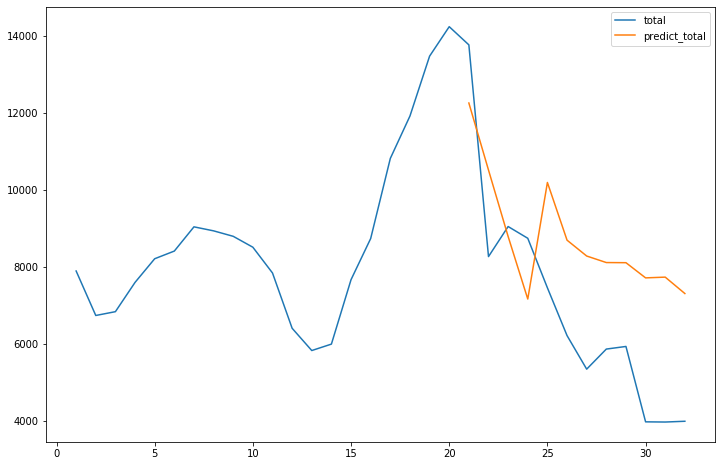

In [153]:
df2['predict_total'] = results.predict(start = 20, end= 32, dynamic= True)  
df2[['total', 'predict_total']].plot(figsize=(12, 8))

In [154]:
# npredict = df2.total[0].shape[0]
# fig, ax = plt.subplots(figsize=(12,6))
# npre = 12
# ax.set(title='Total flu', xlabel='Week', ylabel='Infected')
# ax.plot(df2.index[-npredict-npre+1:], df2.ix[-npredict-npre+1:, 'total'], 'o', label='Observed')
# ax.plot(df2.index[-npredict-npre+1:], df2.ix[-npredict-npre+1:, 'preditc_totall'], 'g', label='Dynamic predict_total')
# legend = ax.legend(loc='lower right')
# legend.get_frame().set_facecolor('w')